In [1]:
# 데이터 구성: Series, DataFrame
import pandas as pd

# 행렬 연산
import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# scaling
from sklearn.preprocessing import StandardScaler

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split

# 분류 NN (MLPClassifier)
from sklearn.neural_network import MLPClassifier

# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# confusion matrix
from sklearn.metrics import confusion_matrix

In [2]:
df_raw = pd.read_csv("./HMEQ.csv", engine = "python")
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [3]:
# 결측치 확인
df_raw.isnull().sum(axis = 0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [4]:
# fillna: 결측치 대체 함수
# JOB 변수의 결측치는 "Other"로 대체, inplace:fillna 함수 적용 후 df_raw 데이터에 저장, False면 저장 안함
df_raw["JOB"].fillna("Other", inplace = True)
# 숫자형 변수의 결측치는 해당 변수의 평균값 입력: df_raw.mean() 각 변수별 평균 계산 후 결측치 대체
df_raw.fillna(df_raw.mean(), inplace = True)

In [5]:
# 결측치 확인
df_raw.isnull().sum(axis = 0)

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [6]:
# get_dummies: 데이터의 문자형 변수에 대한 더미 변수 생성
df_raw_dummy = pd.get_dummies(df_raw)
# 더미변수 생성된 데이터의 상위 5개 row를 확인
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [7]:
# 목표 변수, 설명변수 데이터 지정
df_raw_y = df_raw_dummy["BAD"]
df_raw_x = df_raw_dummy.drop("BAD", axis = 1, inplace = False)

In [8]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: randomseed)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               , test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y .shape))

train data X size : (2623, 18)
train data Y size : (2623,)
test data X size : (1125, 18)
test data Y size : (1125,)


### step 2 MLPClassifier 모델 생성
- 기본 옵션으로 모델 생성

In [9]:
nn_uncustomized = MLPClassifier(random_state= 1234)
# hidden_layer_sizes = (100, 100) #변경 (은닉층 2개, 각 은닉층 노드 100개)
nn_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(nn_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(nn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.910
Accuracy on test set: 0.909


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [10]:
nn_uncustomized

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1234, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

### step 2 MLPClassifier 모델 Parameter 변경
- Hidden Layer : 은닉층 변경

In [11]:
# train 및 test 설명력 결과 저장
train_accuracy = []; test_accuracy = []
# hidden_layer_sizes: 은닉층 변경 (20, 30, 60, 80, 100, 120, 140, 160)
para_hidden = [20 * hidden for hidden in range(1,9)] #참조: para_hidden: [29,40,...,160]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes= v_hidden, random_state = 1234)
#     nn = MLPClassifier(hidden_later_sizes = (v_hidden, v_hiiden), random_state = 1234) # 2D (20,20), (40,40)...
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainScore"] = train_accuracy
df_accuracy_hidden["TestScore"] = test_accuracy

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

In [12]:
# 은닉층별 정확도 테이블
df_accuracy_hidden.round(3)

,HiddenLayer,TrainScore,TestScore
0,20,0.909,0.904
1,40,0.910,0.912
2,60,0.910,0.908
3,80,0.907,0.904
4,100,0.910,0.909
5,120,0.129,0.123
6,140,0.910,0.909
7,160,0.910,0.909


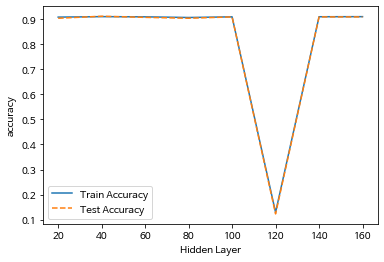

In [13]:
# 모델 정확도 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle="--", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("Hidden Layer")
plt.legend()

In [14]:
# train 및 test 설명력 결과 저장
train_accuracy = []; test_accuracy = []
# hidden_layer_sizes: 은닉층 변경 (20, 30, 60, 80, 100, 120, 140, 160)
para_hidden = [20 * hidden for hidden in range(1,9)] #참조: para_hidden: [29,40,...,160]

for v_hidden in para_hidden:
#     nn = MLPClassifier(hidden_layer_sizes= v_hidden, random_state = 1234)
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden, v_hidden), random_state = 1234) # 2D (20,20), (40,40)...
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainScore"] = train_accuracy
df_accuracy_hidden["TestScore"] = test_accuracy
# 은닉층별 정확도 테이블
df_accuracy_hidden.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

,HiddenLayer,TrainScore,TestScore
0,20,0.910,0.908
1,40,0.907,0.897
2,60,0.910,0.911
3,80,0.911,0.911
4,100,0.910,0.910
5,120,0.910,0.909
6,140,0.909,0.907
7,160,0.884,0.889


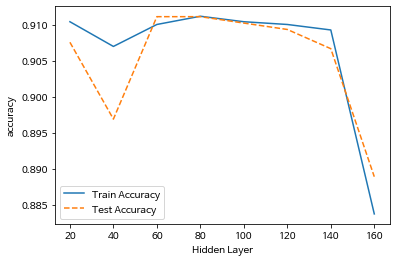

In [15]:
# 모델 정확도 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle="--", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("Hidden Layer")
plt.legend()

### MLPClassifier 모델 Parameter 변경
- Activation: 활성화 함수 변경

In [16]:
# train 및 test 설명력 결과 저장
train_accuracy = []; test_accuracy = []
# activation 변경
para_function = ["logistic", "tanh", "relu"]    # * para_function: ["logistic", "tanh", "relu"]

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainScore"] = train_accuracy
df_accuracy_function["TestScore"] = test_accuracy

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [17]:
# Activation Function별 정확도 테이블
df_accuracy_function.round(3)

,ActivationFunction,TrainScore,TestScore
0,logistic,0.908,0.908
1,tanh,0.908,0.908
2,relu,0.910,0.909


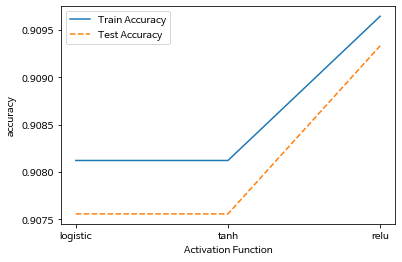

In [18]:
# 모델 정확도 그래프 확인
plt.plot(para_function, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle="--", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("Activation Function")
plt.legend()

### step 2 scale 변환
- Standardscaler: 설명변수 scale 변경

In [19]:
# 변수명
v_feature_name = df_train_x.columns
# StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
2,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556
3,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,-1.548549,1.548549,2.618672,-0.446497,-0.828257,-0.574064,-0.131804,-0.189556
4,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556


In [20]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: randomseed)
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("test data X size : {}".format(df_scaled_test_x.shape))

train data X size : (2623, 18)
test data X size : (1125, 18)


### scal 조절 후 MLPClassifier 모델 재실행
- scale이 조정된 데이터로 새로운 모델 생성

In [21]:
nn_scaled = MLPClassifier(random_state = 1234)
nn_scaled.fit(df_scaled_train_x, df_train_y)
# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(nn_scaled.score(df_scaled_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(nn_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set: 0.971
Accuracy on test set: 0.943


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### 새로운 MLPClassifier 모델 Parameter 변경
- Hidden Layer: 은닉충 변경

In [22]:
# train 및 test 설명력 결과 저장
train_accuracy = []; test_accuracy = []
# hidden_layer_sizes: 은닉층 변경 (20~240, by 30)
para_hidden = [20 * hidden for hidden in range(1,11)] #참조: para_hidden: [20,40,...,160]

for v_hidden in para_hidden:
#     nn = MLPClassifier(hidden_layer_sizes= v_hidden, random_state = 1234)
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden, v_hidden), random_state = 1234) 
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
# 결과 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainScore"] = train_accuracy
df_accuracy_hidden["TestScore"] = test_accuracy

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

In [23]:
# 은닉층별 정확도 테이블
df_accuracy_hidden.round(3)

,HiddenLayer,TrainScore,TestScore
0,20,0.975,0.948
1,40,0.994,0.952
2,60,0.999,0.949
3,80,1.000,0.955
4,100,1.000,0.953
5,120,1.000,0.951
6,140,1.000,0.955
7,160,1.000,0.955
8,180,1.000,0.957
9,200,1.000,0.956


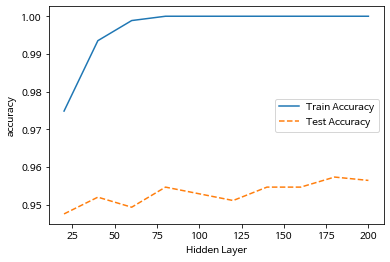

In [24]:
# 모델 정확도 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle="--", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("Hidden Layer")
plt.legend()

In [25]:
# 은닉층 지정(임의)
hidden_layer_sizes = 80

### MLPClassifier 모델 Parameter 변경
- Activation: 활성화 함수 변경

In [26]:
# train 및 test 설명력 결과 저장
train_accuracy = []; test_accuracy = []
# activation 변경
para_function = ["logistic", "tanh", "relu"]

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, hidden_layer_sizes = (80,80), random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
# 결과 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainScore"] = train_accuracy
df_accuracy_function["TestScore"] = test_accuracy
# Activation Function별 정확도 테이블
df_accuracy_function.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,ActivationFunction,TrainScore,TestScore
0,logistic,0.937,0.933
1,tanh,0.999,0.952
2,relu,1.000,0.955


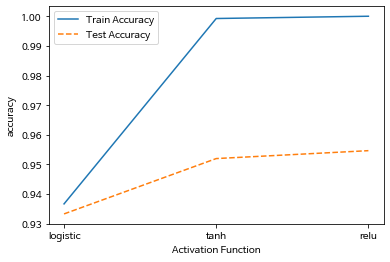

In [27]:
# 모델 정확도 그래프 확인
plt.plot(para_function, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle="--", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("Activation Function")
plt.legend()

### Solver : 가중치 최적화 변경

In [28]:
# train 및 test 설명력 결과 저장
train_accuracy = []; test_accuracy = []
# solver 변경
para_solver = ["lbfgs", "sgd", "adam"]

for v_solver in para_solver:
    nn = MLPClassifier(solver = v_solver, activation="relu", hidden_layer_sizes = (80,80), random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_solver = pd.DataFrame()
df_accuracy_solver["Solver"] = para_solver
df_accuracy_solver["TrainScore"] = train_accuracy
df_accuracy_solver["TestScore"] = test_accuracy

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [29]:
# Solver별 정확도 테이블
df_accuracy_solver.round(3)

,Solver,TrainScore,TestScore
0,lbfgs,1.000,0.948
1,sgd,0.934,0.928
2,adam,1.000,0.955


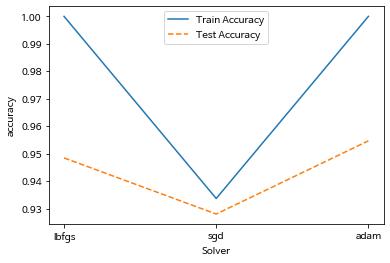

In [30]:
# 모델 정확도 그래프 확인
plt.plot(para_solver, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_solver, test_accuracy, linestyle="--", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("Solver")
plt.legend()

In [31]:
# Solver 지정(임의)
solver = "adam"

### Mini Batch 변경

In [32]:
# train 및 test 설명력 결과 저장
train_accuracy = []; test_accuracy = []
# Mini Batch 변경
para_batch = [20 * batch for batch in range(1,10)] #참조: para_batch: [20,40,...,180]

for v_batch in para_batch:
    nn = MLPClassifier(batch_size= v_batch, solver= "adam", activation="relu",
                      hidden_layer_sizes=(80,80), random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["Mini Batch"] = para_batch
df_accuracy_batch["TrainScore"] = train_accuracy
df_accuracy_batch["TestScore"] = test_accuracy

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

In [33]:
# Mini Batch Size별 정확도 테이블
df_accuracy_batch.round(3)

,Mini Batch,TrainScore,TestScore
0,20,1.0,0.959
1,40,1.0,0.956
2,60,1.0,0.950
3,80,1.0,0.952
4,100,1.0,0.952
5,120,1.0,0.953
6,140,1.0,0.953
7,160,1.0,0.954
8,180,1.0,0.956


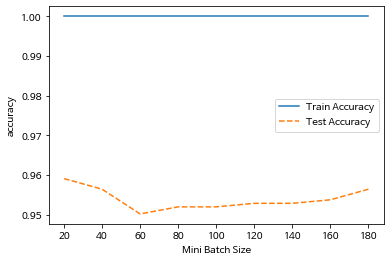

In [34]:
# 정확도 그래프 표현
plt.plot(para_batch, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_batch, test_accuracy, linestyle="--", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("Mini Batch Size")
plt.legend()

### 결론 도출
- 최종 모델 선택

In [35]:
#최종모델
nn_final = MLPClassifier( hidden_layer_sizes=(80,80),activation="relu", solver= "adam",
                          batch_size = 100,random_state = 1234)
nn_final.fit(df_scaled_train_x, df_train_y)
#평가
y_pred = nn_final.predict(df_scaled_test_x)

# train 데이터 셋 정확도
print("Accuracy on training set: {0:.3f}\n".format(nn_final.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {0:.3f}\n".format(nn_final.score(df_scaled_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 1.000

Accuracy on test set: 0.952

Confusion matrix: 
[[1018    3]
 [  51   53]]
